Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as any collaborators you worked with:

In [25]:
COLLABORATORS = "HARSHUL GUPTA"

--

In [43]:
%matplotlib inline
%precision 16
import numpy
import matplotlib.pyplot as plt
import pandas as pd

# Final Project

This notebook will provide a brief structure and rubric for presenting your final project. 

The purpose of the project is 2-fold
* To give you an opportunity to work on a problem you are truly interested in (as this is the best way to actually learn something)
* To demonstrate to me that you understand the overall workflow of problem solving from problem selection to implementation to discussion 

You can choose any subject area that interests you as long as there is a computational component to it.  However, please do not reuse projects or homeworks you have done in other classes.  This should be **your** original work.

**You can work in teams, but clearly identify each persons contribution** and every team member should hand in their own copy of the notebook.

### Structure
There are 5 parts for a total of 100 points that provide the overall structure of a mini research project.

* Abstract
* Introduction and Problem Description
* Brief discussion of Computational approach and import of any additional packages
* Implementation including tests
* Discussion of results and future directions

For grading purposes, please try to make this notebook entirely self contained. 

The project is worth about 2 problem sets and should be of comparable length (please: I will have about 100 of these to read and I am not expecting full 10 page papers).  The actual project does not necessarily have to work but in that case you should demonstrate that you understand why it did not work and what steps you would take next to fix it.

Have fun

## Abstract [10 pts]

Provide a 1-2 paragraph abstract of the project in the style of a research paper.  The abstract should contain

* A brief description of the problem
* A brief justification describing why this problem is important/interesting to you
* A general description of the computational approach
* A brief summary of what you did and what you learned


### Numerical Methods for HJB Equations and Mean Field Games



## Introduction [15 pts]

In ~4-5 paragraphs, describe 
* The general problem you want to solve
* Why it is important and what you hope to achieve.

Please provide basic **references**, particularly if you are reproducing results from a paper. Also include any basic equations you plan to solve. 

Please use proper spelling and grammar. 

YOUR ANSWER HERE

### References

YOUR ANSWER HERE

## Computational  Methods [5 pts]

Describe the specific approach you will take to solve some concrete aspect of the general problem. 

You should  include all the numerical or computational methods you intend to use.  These can include methods or packages  we did not discuss in class but provide some reference to the method. You do not need to explain in detail how the methods work, but you should describe their basic functionality and justify your choices. 




YOUR ANSWER HERE

**If you need to install or import any additional python packages,  please provide complete installation instructions in the code block below**


In [115]:
# Provide complete installation or import information for external packages or modules here e.g.

#pip install somepackage
# from somepackage import blah
import numpy as np
import scipy
import time

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

## Implementation [60 pts]

Use the Markdown and Code blocks below to implement and document your methods including figures.  Only the first markdown block will be a grading cell but please add (not copy) cells in this section to organize your work. 

Please make the description of your problem readable by interlacing clear explanatory text with code (again with proper grammar and spelling). 
All code should be well described and commented.

For at least one routine you code below, you should provide a test block (e.g. using `numpy.testing` routines, or a convergence plot) to validate your code.  

An **important** component of any computational paper is to demonstrate to yourself and others that your code is producing correct results.

### Numerical Methods for HJB Equations and Mean Field Games


## Hamilton-Jacobi-Bellman (HJB) Equations

The goal of this thesis is to propose numerical methods for solving **HJB equations**, which are nonlinear controlled partial differential equations (PDEs) arising from **optimal control theory**.

Consider a dynamical system where a controller, starting at state \( (x, t) \), controls the future evolution of the state via a control variable \( c \), aiming to optimize a cumulative objective function. For example, in a competitive smartphone market, a company sets its smartphone price (control variable) based on its current capacity (state) to maximize long-term profit (objective function).

We are interested in two key quantities:
1. **Value function** \( u(x, t) \), which represents the optimal objective function.
2. **Optimal control** \( c^*(x, t) \), which maximizes the objective function.

An HJB equation models this system by coupling the value function \( u(x, t) \) and the optimal control \( c^*(x, t) \) as follows:

1. **HJB Equation**:
   $$
   L_{c^*}(x,t) u(x, t) = 0,
   $$
   where \( L \) is a second-order differential operator acting on \( u(x, t) \). 

2. **Optimal Control Condition**:
   $$
   c^*(x, t) = \arg \max_{c(x,t)} H(x, t; c(x,t); u(x,t)),
   $$
   where \( H \) is the **Hamiltonian**, and optimizing it is equivalent to solving the dynamic programming problem.

The HJB equation couples two sub-problems:
- A **PDE** (1.1), where the solution is the value function \( u(x, t) \) for a given optimal control \( c^*(x, t) \).
- An **optimization problem** (1.2) to find the control \( c(x,t) \) that optimizes the Hamiltonian.

Solving the HJB equation gives both the value function \( u(x, t) \) and the optimal control \( c^*(x, t) \) simultaneously.


## Mean Field Games (MFG)

Mean Field Games (MFG) are a subfield of game theory in continuous spacetime, where a large number of players interact in a competitive setting. A typical example is the competitive smartphone market, where each company optimizes its pricing strategy (control) based on its current state. 

When there are many companies, the system becomes extremely complex, with each company's actions affecting all others. However, as the number of companies \( N \) becomes large, each company’s impact on the entire system becomes negligible, simplifying the model. In this "mean field" approximation, companies respond to the average behavior (distribution) of other companies, rather than to individual actions.

Mathematically, this leads to a system of two nonlinear PDEs:
1. A **Hamilton-Jacobi-Bellman (HJB) equation** for the value function of all players.
2. A **Kolmogorov-Fokker-Planck (KFP) equation** for the distribution of the players’ states.

This MFG model provides a good approximation of the original \( N \)-player game when \( N \) is large, greatly simplifying the system. MFGs have numerous applications, including in economics, sociology, engineering, and urban planning, where large populations of agents interact under competitive conditions.


## 1. Introduction to Mean Field Games Theory

We fix a finite time horizon $T > 0$ and work in the state space $\mathbb{R}^d$. Let $f: \mathbb{R}^d \times \mathbb{R} \times \mathbb{R}^d \to \mathbb{R}$ and $\varphi: \mathbb{R} \times \mathbb{R} \to \mathbb{R}$ be the running cost and terminal cost, respectively. 

### The Mean Field Game Problem
We seek a flow of probability densities $\hat{m}$ and a feedback control $\hat{v}$ that satisfy the following conditions:
1. **Control Problem**: Minimize the cost functional $J_{\hat{m}}(v)$ for a feedback control $v$:
   $$
   J_{\hat{m}}(v) = \mathbb{E} \left[ \int_0^T f(X_v(t), \hat{m}(t, X_v(t)), v(t, X_v(t))) \, dt + \varphi(X_v(T), \hat{m}(T, X_v(T))) \right]
   $$
2. **Stochastic Dynamics**: The process $X_v(t)$ solves the SDE:
   $$
   dX_v(t) = b(X_v(t), \hat{m}(t, X_v(t)), v(t, X_v(t))) \, dt + \sigma dW_t
   $$
   where $\sigma > 0$, and $X_v(0)$ is distributed according to $m_0$.

3. **Density Constraint**: $\hat{m}(t, \cdot)$ is the law of $X_v(t)$.

### Kolmogorov-Fokker-Planck Equation
For a given feedback control $v$, the density $m_v(t)$ of $X_v(t)$ solves the KFP equation:
$$
\partial_t m_v(t, x) - \nu \Delta m_v(t, x) + \text{div}(m_v(t, \cdot) b(\cdot, m_v(t, \cdot), v(t, \cdot))) = 0
$$
where $\nu = \frac{\sigma^2}{2}$.

### Value Function and HJB Equation
The value function $u(t, x)$ of the control problem satisfies the HJB equation:
$$
\partial_t u(t, x) + \nu \Delta u(t, x) - H(x, m(t, x), \nabla u(t, x)) = 0
$$
with the Hamiltonian:
$$
H(x, m, p) = \sup_{\gamma \in \mathbb{R}^d} \left( - f(x, m, \gamma) - \langle b(x, m, \gamma), p \rangle \right)
$$
where we assume $H$ is well-defined, $C^1$ with respect to $(x, p)$, and strictly convex in $p$.

### Forward-Backward PDE System
The system of equations for $(u, m)$ is:
$$
\begin{aligned}
- \partial_t u(t, x) - \nu \Delta u(t, x) + H(x, m(t, x), \nabla u(t, x)) &= 0 \\
\partial_t m(t, x) - \nu \Delta m(t, x) - \text{div}\left( m(t, \cdot) \partial_p H(\cdot, m(t, \cdot), \nabla u(t, \cdot)) \right) &= 0
\end{aligned}
$$
with boundary conditions:
$$
u(T, x) = \varphi(x, m(T, x)), \quad m(0, x) = m_0(x)
$$

This forward-backward system describes the dynamics of both the optimal control and the distribution of agents in a Mean Field Game.


Let $N_T$ and $N_h$ be two positive integers. We consider $N_T + 1$ points in time and $N_h$ points in space. Define the time step $\Delta t = \frac{T}{N_T}$ and the spatial step $h = \frac{1}{N_h - 1}$, with $t_n = n \cdot \Delta t$ and $x_i = i \cdot h$ for $(n, i) \in \{0, \dots, N_T\} \times \{0, \dots, N_h - 1\}$.

We approximate the functions $u$ and $m$ by vectors $U$ and $M$ in $\mathbb{R}^{(N_T + 1) \times N_h}$, so that:
$$
u(t_n, x_i) \approx U_{n,i}, \quad m(t_n, x_i) \approx M_{n,i}, \quad \forall (n, i) \in \{0, \dots, N_T\} \times \{0, \dots, N_h - 1\}.
$$

To handle **Neumann boundary conditions**, we introduce **ghost nodes** at $x_{-1} = -h$ and $x_{N_h} = 1 + h$, and set:
$$
U_{n,-1} = U_{n,0}, \quad U_{n,N_h} = U_{n,N_h-1}, \quad M_{n,-1} = M_{n,0}, \quad M_{n,N_h} = M_{n,N_h-1}.
$$


## Finite Differences Operators

We introduce the following finite difference operators:

- **First derivative with respect to time**:
  $$
  \partial_t w(t_n, x) \leftrightarrow (D_t W)_n = \frac{W_{n+1} - W_n}{\Delta t}, \quad n \in \{0, \dots, N_T - 1\}, \quad W \in \mathbb{R}^{N_T + 1}
  $$

- **First derivative with respect to space**:
  $$
  \partial_x w(t, x) \leftrightarrow (D_x W)_i = \frac{W_{i+1} - W_i}{h}, \quad i \in \{0, \dots, N_h - 1\}, \quad W \in \mathbb{R}^{N_h}
  $$

- **Second derivative with respect to space**:
  $$
  \partial_x^2 w(t, x) \leftrightarrow (\Delta_h W)_i = \frac{W_{i+1} - 2W_i + W_{i-1}}{h^2}, \quad i \in \{0, \dots, N_h - 1\}, \quad W \in \mathbb{R}^{N_h}
  $$

- **Gradient in space**:
  $$
  [\nabla_h W]_i = \left( (D_x W)_i, (D_x W)_{i-1} \right), \quad i \in \{0, \dots, N_h - 1\}, \quad W \in \mathbb{R}^{N_h}
  $$

These operators can be represented in matrix form. Consider a matrix $W \in \mathbb{R}^{(N_T + 1) \times N_h}$, we have:

- **First derivative with respect to space**:

  $$
  \partial_x(t_n, x_i) \quad (0 \leq n \leq N_T, \, 0 \leq i \leq N_h - 1) \leftrightarrow \frac{1}{h} 
  \begin{pmatrix}
  -1 & 1 & 0 & \cdots & 0 \\
  0 & -1 & 1 & \cdots & 0 \\
  0 & 0 & -1 & 1 & \cdots \\
  \vdots & \vdots & \vdots & \ddots & \vdots \\
  0 & 0 & \cdots & 0 & -1 & 1 \\
  0 & 0 & \cdots & 0 & 0 & 0
  \end{pmatrix}
  \begin{pmatrix}
  W_0^0 & W_1^0 & \cdots & W_{N_T}^0 \\
  W_0^1 & W_1^1 & \cdots & W_{N_T}^1 \\
  \vdots & \vdots & \ddots & \vdots \\
  W_0^{N_h-1} & W_1^{N_h-1} & \cdots & W_{N_T}^{N_h-1}
  \end{pmatrix}
  $$

  In the last row, we take into account the **Neumann boundary conditions**, considering that $U_{N_h} = U_{N_h-1}$ and $M_{N_h} = M_{N_h-1}$. Let $D_x$ be the matrix above.

- **Second derivative with respect to space**:

  $$
  \partial_x^2(t_n, x_i) \quad (0 \leq n \leq N_T, \, 0 \leq i \leq N_h - 1) \leftrightarrow \frac{1}{h^2}
  \begin{pmatrix}
  -1 & 1 & 0 & \cdots & 0 \\
  1 & -2 & 1 & 0 & \cdots \\
  0 & 1 & -2 & 1 & \cdots \\
  \vdots & \vdots & \vdots & \ddots & \vdots \\
  0 & 0 & \cdots & -2 & 1 \\
  0 & 0 & \cdots & 1 & -1
  \end{pmatrix}
  \begin{pmatrix}
  W_0^0 & W_1^0 & \cdots & W_{N_T}^0 \\
  W_0^1 & W_1^1 & \cdots & W_{N_T}^1 \\
  \vdots & \vdots & \ddots & \vdots \\
  W_0^{N_h-1} & W_1^{N_h-1} & \cdots & W_{N_T}^{N_h-1}
  \end{pmatrix}
  $$

  Denote the matrix above as $D_x^2$.

- **Gradient operator**:

  The matrix corresponding to $((D_x W)_i) = \frac{1}{h} (W_i - W_{i-1})$ for $0 \leq i < N_h$ (due to the Neumann boundary conditions) is:
  
  $$
  \frac{1}{h}
  \begin{pmatrix}
  0 & 0 & 0 & \cdots & 0 \\
  -1 & 1 & 0 & \cdots & 0 \\
  0 & -1 & 1 & \cdots & 0 \\
  \vdots & \vdots & \vdots & \ddots & \vdots \\
  0 & 0 & \cdots & 1 & 0 \\
  0 & 0 & \cdots & -1 & 1
  \end{pmatrix}
  $$

These finite difference operators are used to approximate the derivatives in both time and space, and they take into account the Neumann boundary conditions.


## Solving the HJB Equation

To derive a discrete version of the HJB equation, we need to define a discrete version of the Hamiltonian. We model \( H_0(x, p) = \frac{1}{\beta} |p|^\beta - g(x) \) as:
$$
\tilde{H}(x, p_1, p_2) = \frac{1}{\beta} \left( (p_1)^2 + (p_2)^2 \right) + \frac{\beta}{2} - g(x)
$$
where \( x^+ = \max(0, x) \) and \( x^- = \max(0, -x) \). Note that \( \tilde{H} \) takes three arguments instead of two.

Now, we consider the following discrete version of the HJB equation, which includes Neumann boundary conditions and a terminal condition:
$$
\begin{aligned}
- (D_t U_i)_n - \nu ( \Delta_h U_n )_i + \tilde{H} \left( x_i, [\nabla_h U_n]_i \right) &= \tilde{f}_0(M_{n+1, i}), \quad 0 \leq i < N_h, \ 0 \leq n < N_T \\
U_{n,-1} &= U_{n, 0}, \quad 0 \leq n < N_T \\
U_{n, N_h} &= U_{n, N_h-1}, \quad 0 \leq n < N_T \\
U_{N_T, i} &= \varphi(x_i, M_{N_T, i}), \quad 0 \leq i < N_h
\end{aligned}
$$
This scheme uses an **implicit Euler scheme**, as the equation is backward in time. Given \( M_{n+1} \) and \( U_{n+1} \), we solve for \( U_n \). To solve this, we introduce the function:
$$
F(U_n, U_{n+1}, M_{n+1}) := \begin{pmatrix}
-(D_t U_0)_n - \nu (\Delta_h U_n)_0 + \tilde{H}(x_0, [\nabla_h U_n]_0) - \tilde{f}_0(M_{n+1, 0}) \\
-(D_t U_i)_n - \nu (\Delta_h U_n)_i + \tilde{H}(x_i, [\nabla_h U_n]_i) - \tilde{f}_0(M_{n+1, i}) \\
\vdots \\
-(D_t U_{N_h-1})_n - \nu (\Delta_h U_n)_{N_h-1} + \tilde{H}(x_{N_h-1}, [\nabla_h U_n]_{N_h-1}) - \tilde{f}_0(M_{n+1, N_h-1})
\end{pmatrix}
$$
When solving the HJB equation, our goal is to find \( U_n \) given \( U_{n+1} \) and \( M_{n+1} \). The terminal condition \( U_{N_T, i} = \varphi(M_{N_T, i}) \) allows initialization for \( n = N_T \).

For \( n < N_T \), we use **Newton-Raphson iterations**, which involves estimating \( U_n \) as the limit of a sequence \( (U_{n,k})_k \), defined by:
$$
U_{n,k+1} = U_{n,k} - J^{-1}(U_{n,k}, U_{n+1}, M_{n+1}) F(U_{n,k}, U_{n+1}, M_{n+1})
$$
where \( J^{-1}(V, U_{n+1}, M_{n+1}) \) is the Jacobian of the map \( V \mapsto F(V, U_{n+1}, M_{n+1}) \). We initialize \( U_{n,0} = U_{n+1} \), and stop the Newton iterations when \( \| F(U_{n,k}, U_{n+1}, M_{n+1}) \| \) is below a threshold (e.g., \( 10^{-12} \)).

### Closed Form of the Jacobian

Let \( F_i \) be the \( i \)-th coordinate of \( F(U_n, U_{n+1}, M_{n+1}) \). The Jacobian is defined as:
$$
J(V, U_{n+1}, M_{n+1}) = \begin{pmatrix}
\frac{\partial F_0}{\partial V_0} & \frac{\partial F_0}{\partial V_1} & \cdots & \frac{\partial F_0}{\partial V_{N_h-1}} \\
\frac{\partial F_1}{\partial V_0} & \frac{\partial F_1}{\partial V_1} & \cdots & \frac{\partial F_1}{\partial V_{N_h-1}} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial F_{N_h-1}}{\partial V_0} & \frac{\partial F_{N_h-1}}{\partial V_1} & \cdots & \frac{\partial F_{N_h-1}}{\partial V_{N_h-1}}
\end{pmatrix}
$$
Notice that \( F_i \) is given by:
$$
F_i = -(D_t U_i)_n - \nu (\Delta_h U_n)_i + \tilde{H}(x_i, [\nabla_h U_n]_i) - \tilde{f}_0(M_{n+1, i})
$$
This term depends only on \( U_{n,i-1}, U_{n,i}, U_{n,i+1} \), so the Jacobian is tridiagonal. Additionally, we have:
$$
\frac{\partial F_i}{\partial U_{n,i-1}} = - \frac{\nu}{h^2} - \frac{1}{h^\beta} \left( (U_{n,i} - U_{n,i-1}) + \left( (U_{n,i+1} - U_{n,i})^2 - (U_{n,i} - U_{n,i-1})^2 \right)^{\beta/2 - 1} \right)
$$
$$
\frac{\partial F_i}{\partial U_{n,i}} = \frac{1}{\Delta t} + \frac{2\nu}{h^2} + \frac{1}{h^\beta} \left( (U_{n,i+1} - U_{n,i}) + (U_{n,i} - U_{n,i-1}) \right) \left( \left( (U_{n,i+1} - U_{n,i})^2 - (U_{n,i} - U_{n,i-1})^2 \right)^{\beta/2 - 1} \right)
$$
$$
\frac{\partial F_i}{\partial U_{n,i+1}} = - \frac{\nu}{h^2} - \frac{1}{h^\beta} \left( (U_{n,i+1} - U_{n,i}) - \left( (U_{n,i+1} - U_{n,i})^2 - (U_{n,i} - U_{n,i-1})^2 \right)^{\beta/2 - 1} \right)
$$

Let \( J_H \) be the Jacobian of \( U_n \mapsto \tilde{H}(x_i, [\nabla_h U_n]_i) \), evaluated at \( U_n \), which will be useful in the sequel. The coefficients of \( J_H \) are:
$$
(J_H)_{i,i-1} = - \frac{1}{h^\beta} \left( (U_{n,i} - U_{n,i-1}) + \left( (U_{n,i+1} - U_{n,i})^2 - (U_{n,i} - U_{n,i-1})^2 \right)^{\beta/2 - 1} \right)
$$
$$
(J_H)_{i,i} = \frac{1}{h^\beta} \left( (U_{n,i+1} - U_{n,i}) + (U_{n,i} - U_{n,i-1}) \right) \left( \left( (U_{n,i+1} - U_{n,i})^2 - (U_{n,i} - U_{n,i-1})^2 \right)^{\beta/2 - 1} \right)
$$
$$
(J_H)_{i,i+1} = - \frac{1}{h^\beta} \left( (U_{n,i+1} - U_{n,i}) - \left( (U_{n,i+1} - U_{n,i})^2 - (U_{n,i} - U_{n,i-1})^2 \right)^{\beta/2 - 1} \right)
$$


## Solving the KFP Equation

To define an appropriate discretization of the KFP equation, we first discuss how to discretize the term:
$$
\partial_x \left( m(t, \cdot) \partial_x u(t, \cdot) \right)^{\beta-2} \partial_x u(t, \cdot) (x).
$$
Recall that:
$$
\partial_x \left( m(t, \cdot) \partial_p H_0(x, \partial_x u(t, x)) \right) \quad \text{(Eq. 22)}
$$
Let us consider a smooth function \( w \in C^\infty([0, T] \times \Omega) \). Using integration by parts and recalling **Neumann boundary conditions**, we get:
$$
- \int_\Omega \partial_x \left( m(t, x) \partial_p H_0(x, \partial_x u(t, x)) \right) w(t, x) \, dx = \int_\Omega m(t, x) \partial_p H_0(x, \partial_x u(t, x)) \partial_x w(t, x) \, dx.
$$

We now propose the following approximation of the right-hand side:
$$
\sum_{i=0}^{N_h - 1} M_{n+1, i} \left[ \frac{\partial p_1 \tilde{H}(x_i, [\nabla_h U_n]_i)}{h} (W_{n,i+1} - W_{n,i}) + \frac{\partial p_2 \tilde{H}(x_i, [\nabla_h U_n]_i)}{h} (W_{n,i} - W_{n,i-1}) \right] \quad \text{(Eq. 23)}
$$

Performing discrete integration by parts, we obtain the discrete counterpart of the left-hand side as:
$$
-h \sum_{i=0}^{N_h-1} T_i(U_n, M_{n+1}) W_{n,i},
$$
where \( T_i(U, M) \) is defined as:
$$
T_i(U, M) = \frac{1}{h} \left( M_i \frac{\partial p_1 \tilde{H}(x_i, [\nabla_h U_n]_i)}{\partial x_i} - M_{i-1} \frac{\partial p_1 \tilde{H}(x_{i-1}, [\nabla_h U_n]_{i-1})}{\partial x_{i-1}} \right),
$$
and similarly for the second term:
$$
+ \frac{1}{h} \left( M_{i+1} \frac{\partial p_2 \tilde{H}(x_{i+1}, [\nabla_h U_n]_{i+1})}{\partial x_{i+1}} - M_i \frac{\partial p_2 \tilde{H}(x_i, [\nabla_h U_n]_i)}{\partial x_i} \right).
$$

We now consider the following discrete version of the KFP equation, supplemented with **Neumann conditions** and the **terminal condition**:
$$
\begin{aligned}
(D_t M_i)_n - \nu (\Delta_h M_{n+1})_i - T_i(U_n, M_{n+1}) &= 0, \quad 0 \leq i < N_h, \quad 0 \leq n < N_T \\
M_{n,-1} &= M_{n,0}, \quad 0 < n \leq N_T \\
M_{n, N_h} &= M_{n, N_h-1}, \quad 0 < n \leq N_T \\
M_0(i) &= \bar{m}_0(x_i), \quad 0 \leq i < N_h
\end{aligned}
$$
where:
$$
\bar{m}_0(x_i) = \int_{|x - x_i| \leq h/2} m_0(x) \, dx \quad \text{or} \quad \bar{m}_0(x_i) = m_0(x_i).
$$

This scheme is implicit, but unlike the HJB scheme, it involves a **forward loop**. Starting from time step \( 0 \), \( M_0(i) = \bar{m}_0(x_i) \) provides an explicit formula for \( M_0 \). At each subsequent time step, \( M_{n+1} \) is computed given \( U_n \) and \( M_n \). The KFP system (Eq. 26) is linear and cant-hand side term derived from the initial and boundary conditions.


## Solving the Whole Forward-Backward System

The idea is to use **Picard fixed point iterations** to compute the sequences \( M := (M_n)_{0 \leq n \leq N_T} \) and \( U := (U_n)_{0 \leq n \leq N_T} \).

Let \( 0 < \theta < 1 \) be a parameter (for instance, \( \theta = 0.01 \)). Let \( (M^{(k)}, U^{(k)}) \) represent the running approximations of \( (M, U) \). The next approximation \( (M^{(k+1)}, U^{(k+1)}) \) is computed as follows:

1. **Solve the discrete HJB equation** given \( (M^{(k)}, U^{(k)}) \). The solution is denoted \( \hat{U}^{(k+1)} \).
2. **Solve the discrete KFP equation** given \( (M^{(k)}, \hat{U}^{(k+1)}) \). The solution is denoted \( \hat{M}^{(k+1)} \).
3. **Update the approximations**:
   $$
   (M^{(k+1)}, U^{(k+1)}) = (1 - \theta)(M^{(k)}, U^{(k)}) + \theta(M^{(k+1)}, U^{(k+1)}).
   $$

The iterations are stopped when the norm of the increment \( (M^{(k+1)}, U^{(k+1)}) - (M^{(k)}, U^{(k)}) \) becomes smaller than a given threshold, say \( 10^{-7} \).

### Initialization

- For the initialization, we set \( M^{(0)}_{n,i} = \bar{m}_0(x_i) \) for all \( 0 \leq i < N_h \) and \( 0 \leq n \leq N_T \).
- The initial matrix \( U^{(0)} \) has minimal impact on the convergence of the algorithm. We set \( U^{(0)}_{n,i} = 0 \) for all \( i, n \).


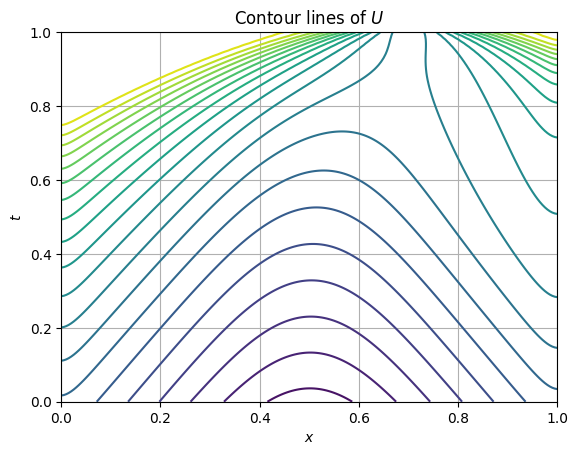

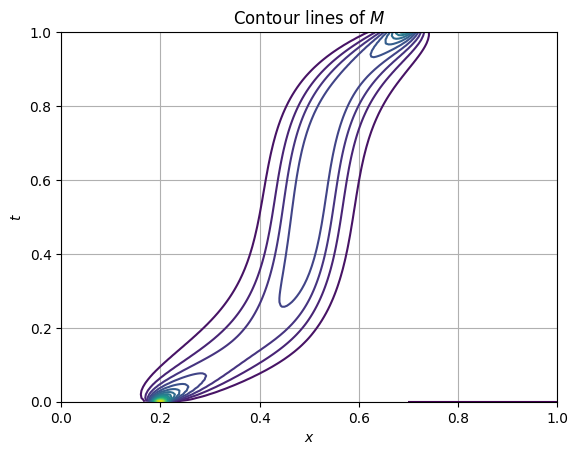

In [2]:
import numpy as np
import scipy.linalg
import time
import matplotlib.pyplot as plt

def solve_market_equations(T=1, sigma=0.2, beta=2, N_h=201, N_T=100, g_kind='default', phi_kind='default', f0_tilde_kind='thin', theta=0.5, picard_stopping_criteria=1e-3, newton_stopping_criteria=1e-11):
    # Set parameters
    nu = sigma**2 / 2
    dt = T / N_T
    h = 1 / (N_h - 1)
    time_grid = np.arange(0, T + dt, dt)
    space_grid = np.arange(0, 1 + h, h)

    # Define functions for the model
    def g_function(x, kind=g_kind):
        if kind == 'default':
            return -np.exp(-40 * (x - 0.5) ** 2)
        elif kind == 'complex':
            return -np.exp(-40 * (x - 1/3) ** 2) - np.exp(-40 * (x - 2/3) ** 2)

    def H0_function(x, p1, p2):
        return 1 / beta * ((np.minimum(0, p1)) ** 2 + (np.maximum(0, p2)) ** 2) ** (beta / 2) - g_function(x)

    def f0_tilde_function(m, kind=f0_tilde_kind):
        if kind == 'thin':
            return m / 10
        elif kind == 'large':
            return m * 10

    def phi_function(x, m=None, kind=phi_kind):
        if kind == 'default':
            return -np.exp(-40 * (x - 0.7) ** 2)
        elif kind == 'complex':
            return -np.exp(-40 * (x - 0.3) ** 2) - np.exp(-40 * (x - 0.9) ** 2)

    def initial_m_function(x):
        return np.exp(-3000 * (x - 0.2) ** 2)

    def m_hat_function(x):
        return initial_m_function(x)

    # Differential operators
    Dx = np.diag([-1] * N_h) + np.diag([1] * (N_h - 1), k=1)
    Dx[N_h - 1, N_h - 1] = 0
    Dx = Dx / h

    Dx_shift = np.diag([1] * N_h) + np.diag([-1] * (N_h - 1), k=-1)
    Dx_shift[0, 0] = 0
    Dx_shift = Dx_shift / h

    Dx2 = np.diag([-2] * N_h) + np.diag([1] * (N_h - 1), k=1) + np.diag([1] * (N_h - 1), k=-1)
    Dx2[0, 0], Dx2[N_h - 1, N_h - 1] = -1, -1
    Dx2 = Dx2 / h ** 2

    # Useful matrix computations
    def compute_F(U_next, U_now, M):
        F = -(U_next - U_now) / dt - nu * Dx2 @ U_now
        F += 1 / beta * (np.minimum(Dx @ U_now, 0) ** 2 + (np.maximum(Dx_shift @ U_now, 0)) ** 2) ** (beta / 2)
        F += -g_function(space_grid) - f0_tilde_function(M)
        return F

    def compute_JH(U):
        backward_spatial_diff = np.maximum(Dx_shift @ U, 0)
        forward_spatial_diff = -np.minimum(Dx @ U, 0)
        coef = backward_spatial_diff ** 2 + forward_spatial_diff ** 2
        coef = np.power(coef, beta / 2 - 1, out=np.zeros_like(coef), where=(coef != 0))

        main_diag = (1 / h * (forward_spatial_diff + backward_spatial_diff) * coef)
        sub_diag = (-1 / h * backward_spatial_diff * coef)[1:]
        sup_diag = (-1 / h * forward_spatial_diff * coef)[:-1]
        JH = np.diag(sub_diag, k=-1) + np.diag(main_diag) + np.diag(sup_diag, k=+1)

        return JH

    def compute_J_banded(U):
        backward_spatial_diff = np.maximum(Dx_shift @ U, 0)
        forward_spatial_diff = -np.minimum(Dx @ U, 0)
        coef = backward_spatial_diff ** 2 + forward_spatial_diff ** 2
        coef = np.power(coef, beta / 2 - 1, out=np.zeros_like(coef), where=(coef != 0))

        sub_diag = (-1 / h * backward_spatial_diff * coef)[1:]
        main_diag = (1 / h * (forward_spatial_diff + backward_spatial_diff) * coef)
        sup_diag = (-1 / h * forward_spatial_diff * coef)[:-1]

        banded_matrix = np.zeros((3, U.size))
        banded_matrix[0, 1:] = sup_diag - nu / h ** 2
        banded_matrix[1] = main_diag + 1 / dt + 2 * nu / h ** 2
        banded_matrix[2, :-1] = sub_diag - nu / h ** 2
        return banded_matrix

    # Solving HJB equation with Newton-Raphson method
    def newton_raphson(U, M):
        U_k = U.copy()
        normF = np.inf
        while normF > newton_stopping_criteria:
            F = compute_F(U, U_k, M)
            J = compute_J_banded(U_k)
            U_k = U_k - scipy.linalg.solve_banded((1, 1), J, F)
            normF = np.linalg.norm(F)
        return U_k

    # Solving HJB equation backward
    def solve_HJB(M):
        U_hat = np.zeros(M.shape)
        U_hat[N_T] = phi_function(space_grid)
        for n in range(N_T - 1, -1, -1):
            U_hat[n] = newton_raphson(U_hat[n + 1], M[n + 1])
        return U_hat

    # Solving KFP equation forward
    def solve_KFP(U):
        M_hat = np.zeros(U.shape)
        M_hat[0] = m_hat_function(space_grid)
        for n in range(N_T):
            JH = compute_JH(U[n])
            M_hat[n + 1] = np.linalg.solve(np.identity(N_h) - nu * dt * Dx2 + dt * JH.T, M_hat[n])
        return M_hat

    # Picard iteration for solving the system
    def picard_iteration(U_old, M_old):
        norm_increment = np.inf
        k = 0
        while norm_increment > picard_stopping_criteria:
            U_hat = solve_HJB(M_old)
            M_hat = solve_KFP(U_hat)

            U_new = (1 - theta) * U_old + theta * U_hat
            M_new = (1 - theta) * M_old + theta * M_hat

            increment = np.hstack((U_new - U_old, M_new - M_old))
            norm_increment = np.linalg.norm(increment)
            k += 1

            U_old, M_old = U_new, M_new

            # if k % 25 == 0:
            #     plt.contour(space_grid, time_grid, U_new, levels=20)
            #     plt.title(f"Contour lines of $U$, k={k}, norm = {norm_increment}")
            #     plt.xlabel("$x$")
            #     plt.ylabel("$t$")
            #     plt.grid()
            #     plt.show()

            #     plt.contour(space_grid, time_grid, M_new, levels=50)
            #     plt.title(f"Contour lines of $M$, k={k}, norm = {norm_increment}")
            #     plt.xlabel("$x$")
            #     plt.ylabel("$t$")
            #     plt.grid()
            #     plt.show()

        return U_new, M_new

    # Initialization
    M = np.zeros((N_T + 1, N_h))
    M[:] = m_hat_function(space_grid)

    U = np.zeros((N_T + 1, N_h))
    U[:] = phi_function(space_grid)

    U_picard, M_picard = picard_iteration(U, M)

    # Plot final results
    plt.contour(space_grid, time_grid, U_picard, levels=20)
    plt.title("Contour lines of $U$")
    plt.xlabel("$x$")
    plt.ylabel("$t$")
    plt.grid()
    plt.show()

    plt.contour(space_grid, time_grid, M_picard, levels=20)
    plt.title("Contour lines of $M$")
    plt.xlabel("$x$")
    plt.ylabel("$t$")
    plt.grid()
    plt.show()

# Example usage
solve_market_equations(beta=2, g_kind='default', phi_kind='default', f0_tilde_kind='thin')


In [9]:
print("\nU (HJB solution) Results:")
print(U_df)

print("\nM (KFP solution) Results:")
print(M_df)


U (HJB solution) Results:


NameError: name 'U_df' is not defined

In [ ]:
# --- Saving values of U and M ---
file_name_suffix = f"beta{str(beta).replace('.', 'virgule')}_g_{g_function_type}_f_{f0_tilde_function_type}_phi_{phi_function_type}"

# Save U_picard
with open(f'U_{file_name_suffix}.npy', 'wb') as f:
    np.save(f, U_picard)

# Save M_picard
with open(f'M_{file_name_suffix}.npy', 'wb') as f:
    np.save(f, M_picard)

print(f"Saved U_picard to 'U_{file_name_suffix}.npy'")
print(f"Saved M_picard to 'M_{file_name_suffix}.npy'")


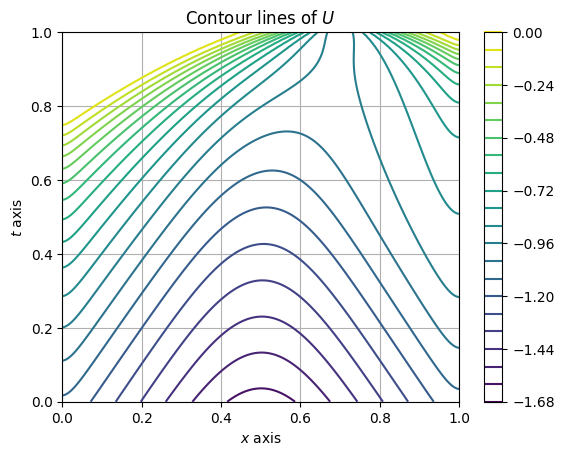

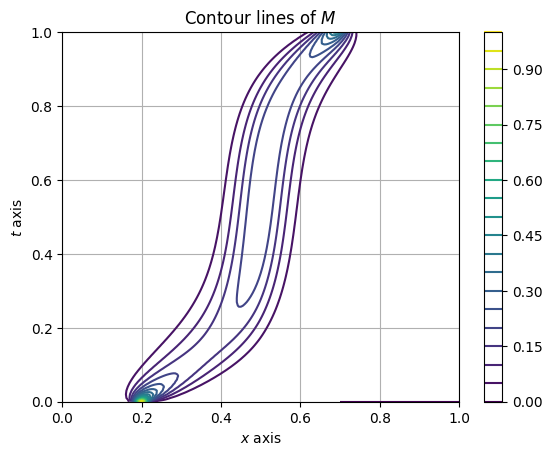

In [165]:
import matplotlib.pyplot as plt

# Plotting U_picard
plt.contour(space_grid, time_grid, U_picard, levels=20)  # Change levels based on 'thin' or 'large'
plt.title("Contour lines of $U$")
plt.xlabel("$x$ axis")
plt.ylabel("$t$ axis")
plt.grid(True)
plt.colorbar()  # Optional: adds a color bar to visualize the value scale
plt.show()

# Plotting M_picard
plt.contour(space_grid, time_grid, M_picard, levels=20)  # Adjust the number of levels as needed
plt.title("Contour lines of $M$")
plt.xlabel("$x$ axis")
plt.ylabel("$t$ axis")
plt.grid(True)
plt.colorbar()  # Optional: adds a color bar to visualize the value scale
plt.show()


## Discussion [10 pts]

Evaluate the results of your project including 
* Why should I believe that your numerical results are correct (convergence, test cases etc)?
* Did the project work (in your opinion)?
* If yes:  what would be the next steps to try
* If no:  Explain why your approach did not work and what you might do to fix it.


YOUR ANSWER HERE